In [9]:
%matplotlib inline
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import sys
import os

# method to import xbtools with try routine
try:
    import xbTools
except ImportError:
    print('**no xbTools installation found in environment, adding parent path of notebook to see if it works')
    sys.path.append(os.path.abspath(os.path.join('..', '..', 'xbeach-toolbox')))

In [10]:
from xbTools.grid.creation import xgrid, ygrid
from xbTools.grid.extension import seaward_extend, lateral_extend
from xbTools.xbeachtools import XBeachModelSetup
from xbTools.general import wave_functions, visualize_mesh

Text(0, 0.5, 'y [m]')

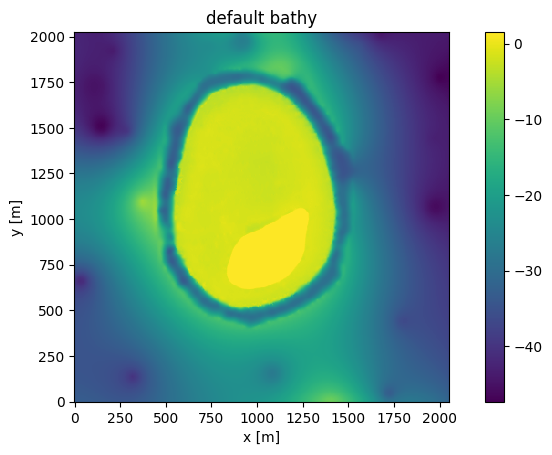

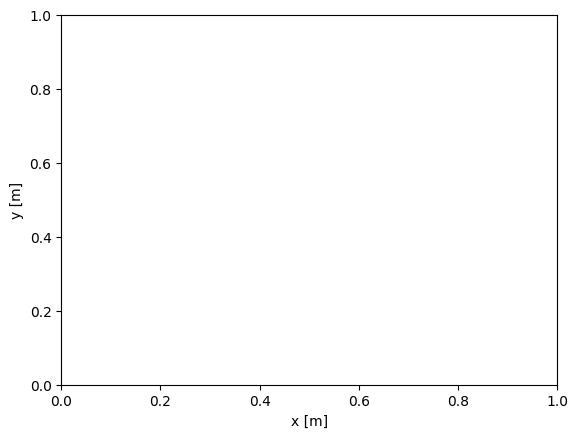

In [11]:
## load data
bathy = np.loadtxt('bathy.dep')

## set bathy grid
nx = 1500
ny = 1500
dx = 1.37
dy = 1.35

x = np.linspace(0,(nx-1)*dx,nx)
y = np.linspace(0,(ny-1)*dy,ny)

X, Y = np.meshgrid(x,y)

## plot
plt.figure()
plt.pcolor(x,y,bathy)
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('default bathy')
plt.axis('scaled')

fig     = plt.figure()
ax      = Axes3D(fig)
surf    = ax.plot_surface(X, Y, bathy, cmap=cm.coolwarm,  linewidth=0, antialiased=False)
plt.xlabel('x [m]')
plt.ylabel('y [m]')

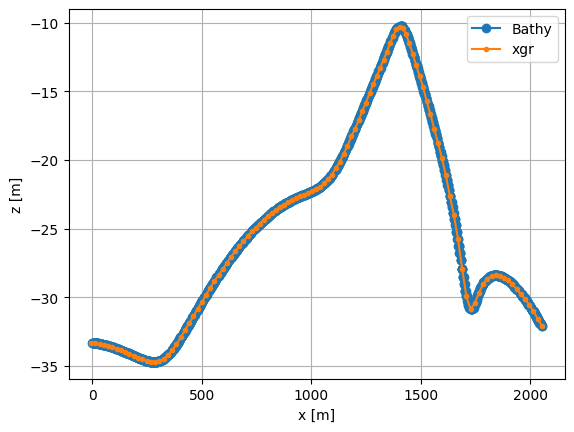

In [12]:
xgr,zgr = xgrid(x, bathy[20,:],dxmin=10)


plt.figure()
plt.plot(x,bathy[20,:],'-o')
plt.plot(xgr,zgr,'.-')
plt.legend(['Bathy','xgr'])
plt.xlabel('x [m]')
plt.ylabel('z [m]')
plt.grid('on')

Enable optimization of transition distance
Area type center
Transition 202.365


Text(0, 0.5, 'dy [m]')

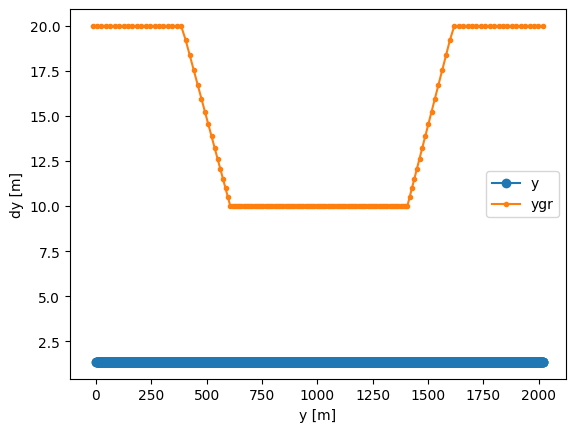

In [13]:
ygr = ygrid(y,dymin=10)

plt.figure()
plt.plot(y[:-1],np.diff(y),'-o')
plt.plot(ygr[:-1],np.diff(ygr),'.-')
plt.legend(['y','ygr'])
plt.xlabel('y [m]')
plt.ylabel('dy [m]')

/tmp/ipykernel_47466/2343223386.py:1: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  f = interpolate.interp2d(x, y, bathy, kind='linear')
/tmp/ipykernel_47466/2343223386.py:3: DeprecationWarning: `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` 

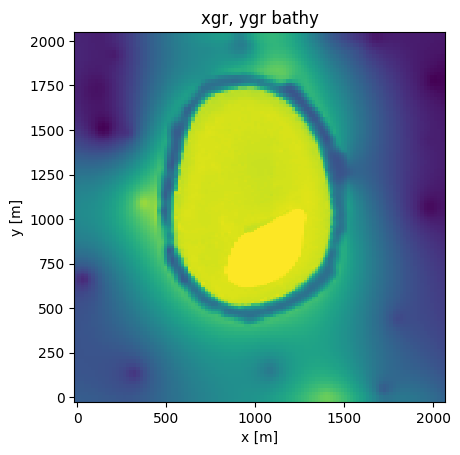

In [14]:
f = interpolate.interp2d(x, y, bathy, kind='linear')

zgr = f(xgr,ygr)

plt.figure()
plt.pcolor(xgr,ygr,zgr)
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('scaled')
plt.title('xgr, ygr bathy')

xgr, ygr = np.meshgrid(xgr,ygr)

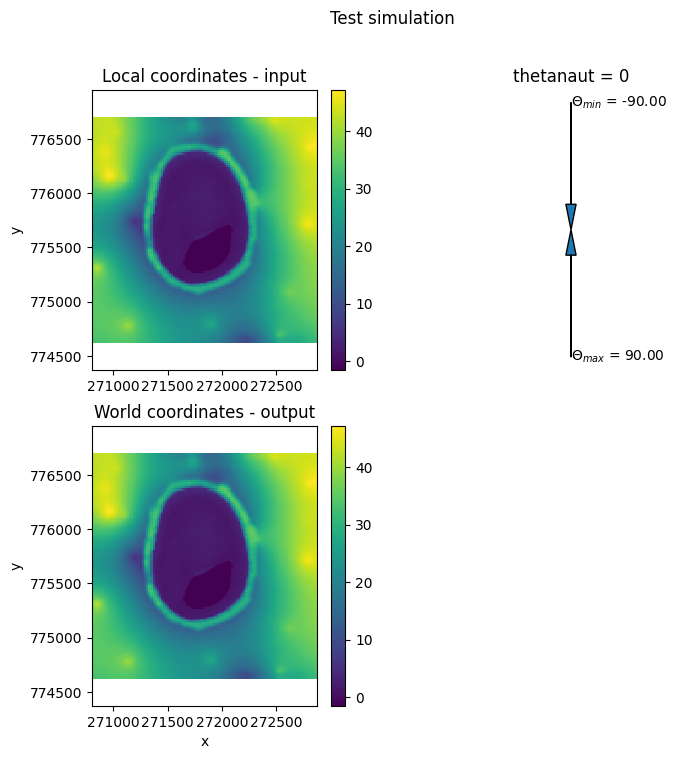

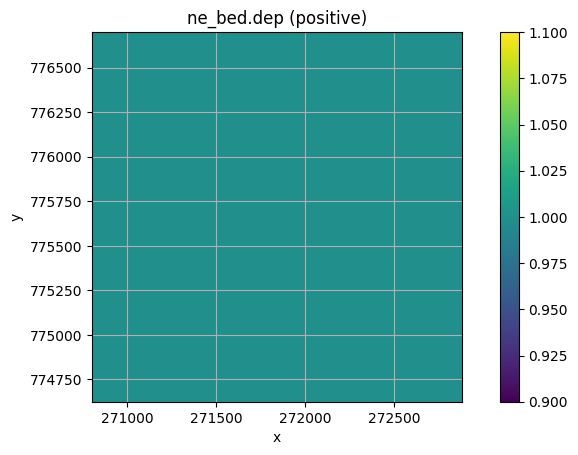

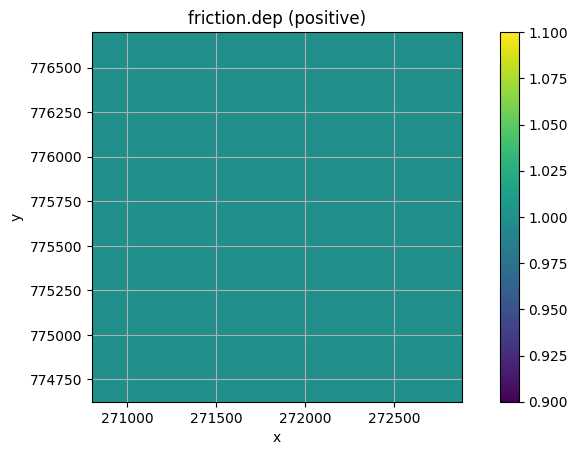

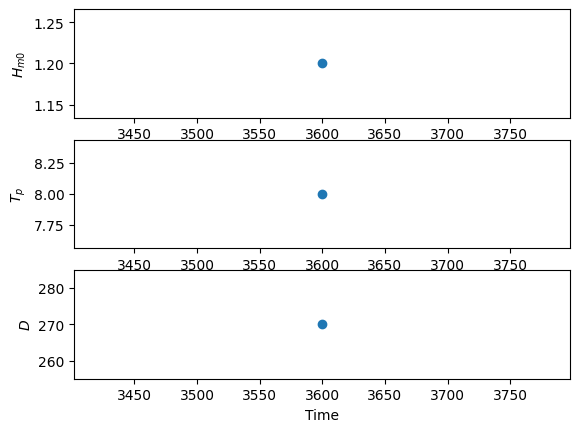

In [15]:
xb_setup = XBeachModelSetup('Test simulation')

xb_setup.set_grid(xgr+270816.6717, ygr+774650.2061, zgr, posdwn=-1, alfa=0)
xb_setup.set_nebed(np.ones_like(zgr))
xb_setup.set_friction(np.ones_like(zgr))

xb_setup.set_waves('jonstable',    {'Hm0'       :   [1.2],
                                    'Tp'        :   [8],
                                    'gammajsp'  :   [3.3],
                                    's'         :   [20],
                                    'mainang'   :   [270],
                                    'duration'  :   [3600],
                                    'dtbc'      :   [1]})

xb_setup.set_params({'Wavemodel'    :   'surfbeat',
                     'morphology'   :   1,
                     'befriccoef'   :   0.01,
                     'tstop'        :   3600,
                     'zs0'          :   0,
                     'nglobalvar'   :   ['zb', 'zs', 'H', 'sedero'],
                     'npointvar'    :   ['zs', 'H'],
                     'nmeanvar'     :   ['zb'],
                     'npoints'      :   ['1 0', '6 0', '10 0', '12 0']})

sim_path = os.path.join('xb-2D')
if not os.path.exists(sim_path):
    os.mkdir(sim_path)
xb_setup.write_model(os.path.join(sim_path))

In [16]:
visualize_mesh.write_mesh_to_shp(xgr+270816.6717, ygr+774650.2061, os.path.join('xb-2D','shape/grid.shp'),0)

/tmp/ipykernel_47466/1160979485.py:1: FionaDeprecationWarning: This function will be removed in version 2.0. Please use CRS.from_epsg() instead.
  visualize_mesh.write_mesh_to_shp(xgr+270816.6717, ygr+774650.2061, os.path.join('xb-2D','shape/grid.shp'),0)


xb-2D/shape/grid.shp is saved
